<a href="https://colab.research.google.com/github/amelia188/DataAnalysis/blob/master/Data_analysis_water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Water Quality Data Analysis 2023

# How to use this Notebook

This is a Google Colab Notebook used for displaying code and text, formatted to be more readable. This dashboard can be updated monthly, easliy shared and is hopefully easy to understand. The Notebook is separated into headings with a dropdown arrow to the left of each heading. Click on these to show the information under the heading.

If you're interested in seeing the code that produced each graph/chart click on the Show Code highlighted in blue.

NB: Don't click on the play button (Run Cell), on the left of the code. This will trigger the code to rerun and you'll lose the graph.

# Weather

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


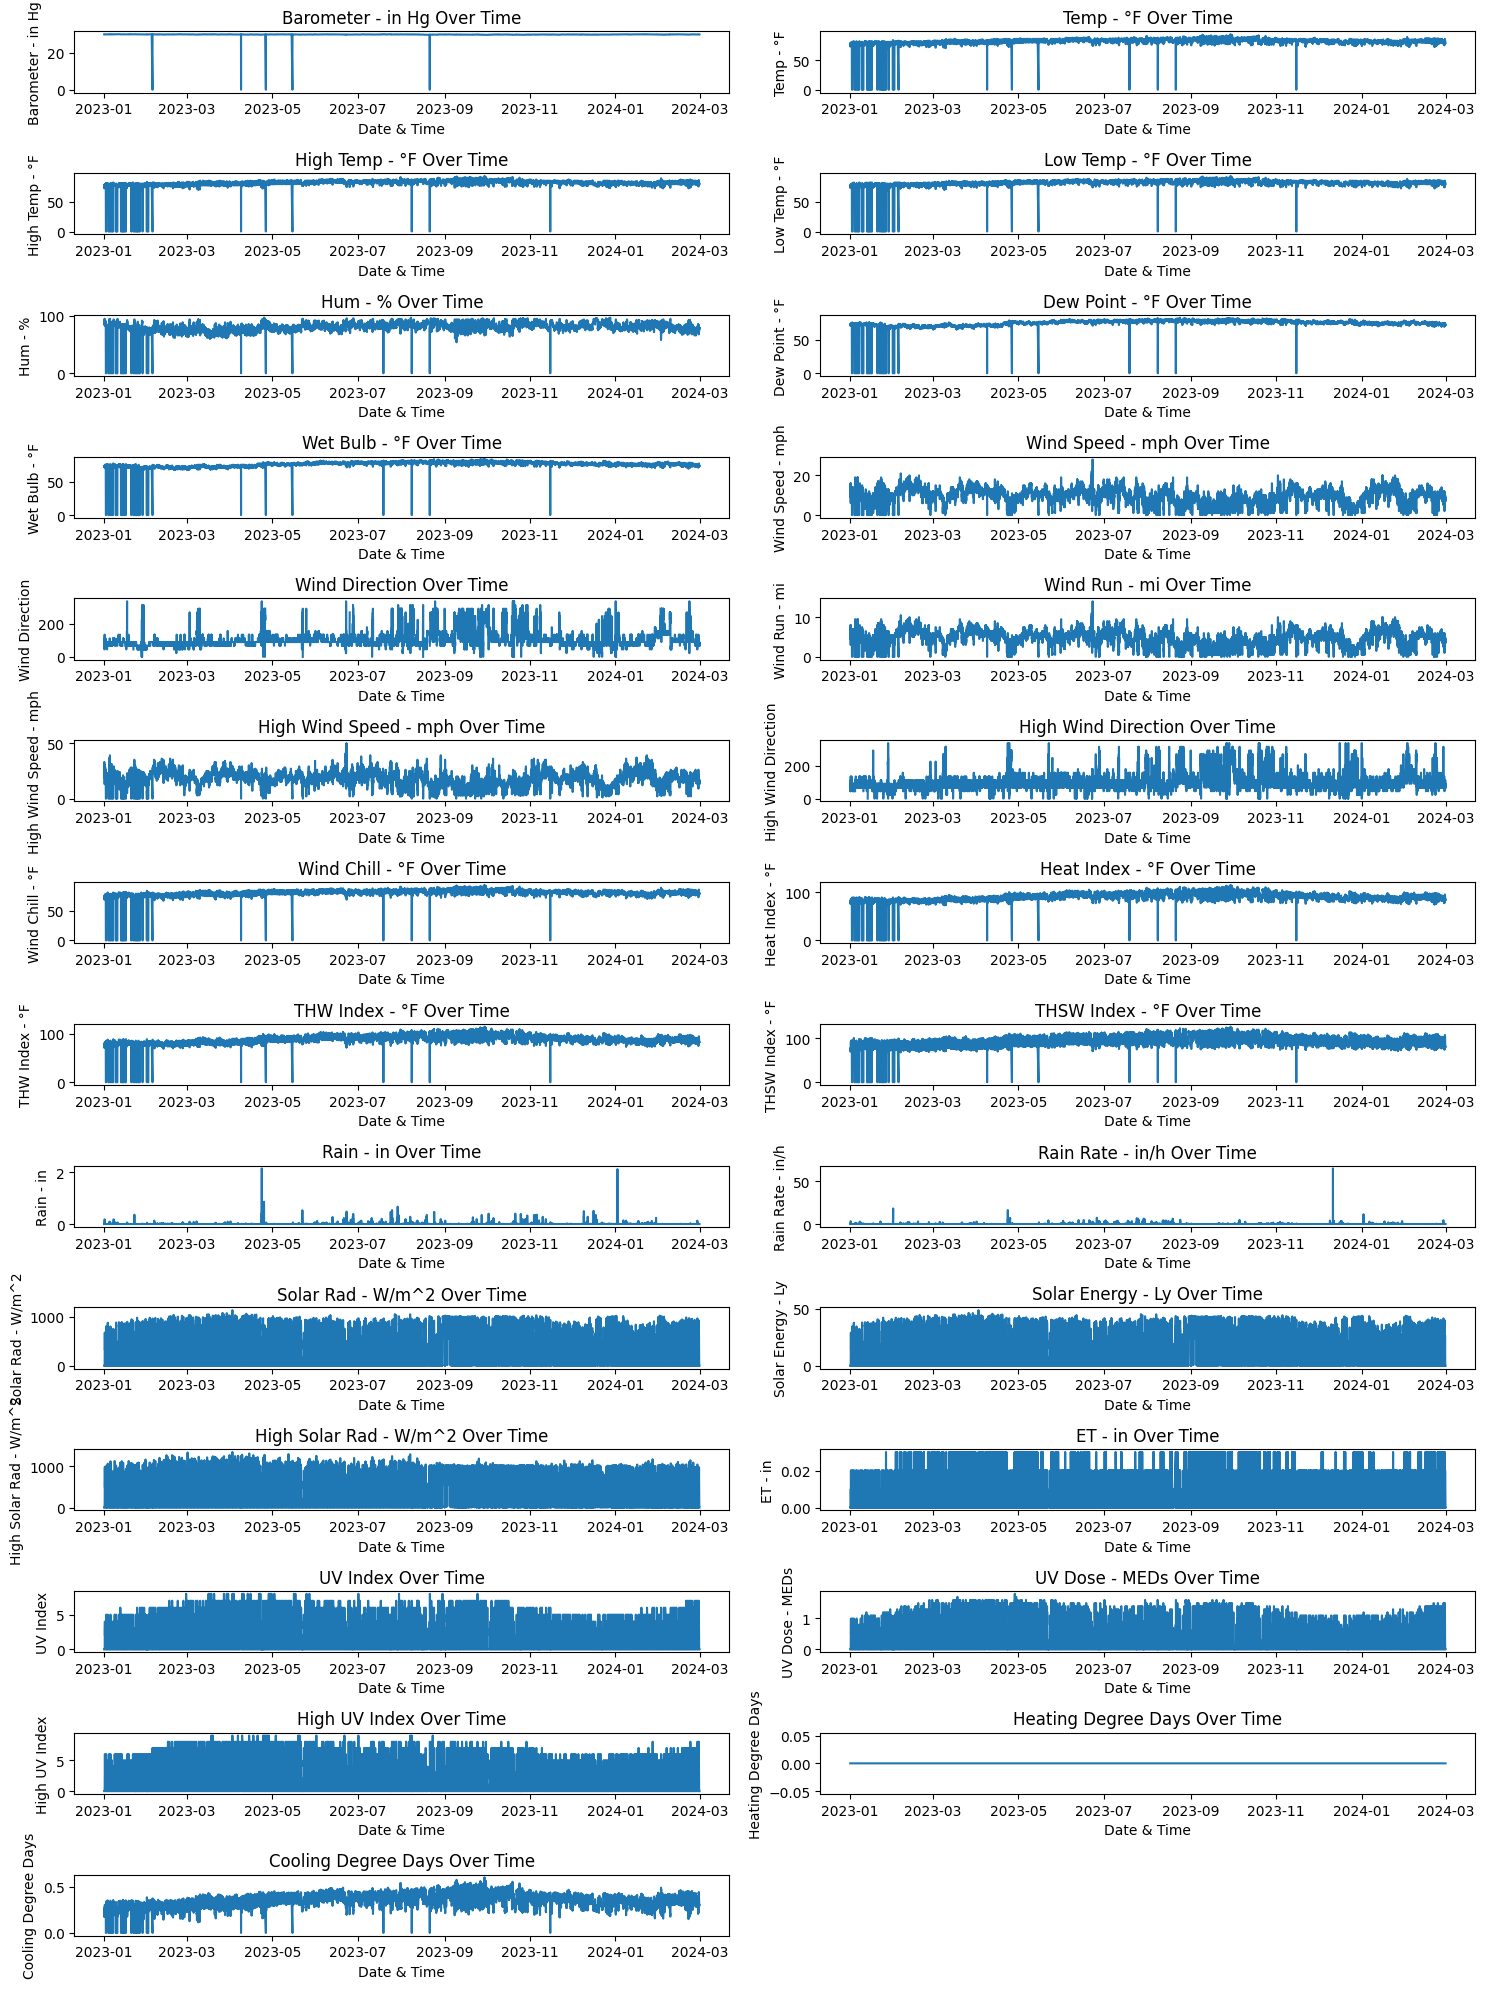

0      Barometer - in Hg     Temp - °F  High Temp - °F  Low Temp - °F  \
count       20231.000000  20231.000000    20231.000000   20231.000000   
mean           29.875449     79.850378       80.298898      79.527853   
std             0.474431     11.658343       11.487081      11.363069   
min             0.000000      0.000000        0.000000       0.000000   
25%            29.840000     79.000000       79.000000      78.000000   
50%            29.890000     81.000000       82.000000      81.000000   
75%            29.930000     84.000000       84.000000      83.000000   
max            30.080000     94.000000       94.000000      93.000000   

0           Hum - %  Dew Point - °F  Wet Bulb - °F  Wind Speed - mph  \
count  20231.000000    20231.000000   20231.000000      20231.000000   
mean      79.924126       73.660373      75.197519          9.283575   
std       12.937778       10.783153      10.947258          4.100566   
min        0.000000        0.000000       0.000000    

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt

# Reading data into df (replace this with your actual data loading step)
df = pd.read_csv("/content/drive/Shareddrives/2.5 Monitoring Data/Surface Water Program/Collated/Weather - utf8.csv", skiprows=4)  # Skip initial non-data rows directly during import

# Replace '--' with 0 for numerical computation
df.replace('--', 0, inplace=True)

# Assuming the actual column names are in the first row of the df after dropping unnecessary rows
df.columns = df.iloc[0]

# Drop the row with column names
df = df[1:]

# Change Date Times
df['Date & Time'] = pd.to_datetime(df['Date & Time'], errors='coerce')

wind_direction_map = {
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5
}

# Assuming the direction is mapped to angles
df['Wind Direction'] = df['Wind Direction'].map(wind_direction_map)
df['High Wind Direction'] = df['High Wind Direction'].map(wind_direction_map)

# Convert numerical columns to their respective types
numerical_cols_to_float = ['Barometer - in Hg', 'Wind Run - mi', 'Rain - in', 'Rain Rate - in/h', 'Solar Energy - Ly', 'ET - in', 'UV Dose - MEDs', 'Heating Degree Days', 'Cooling Degree Days']
numerical_cols_to_int = ['Temp - °F', 'High Temp - °F', 'Low Temp - °F', 'Hum - %', 'Dew Point - °F', 'Wet Bulb - °F', 'Wind Speed - mph', 'High Wind Speed - mph', 'Wind Chill - °F', 'Heat Index - °F', 'THW Index - °F', 'THSW Index - °F', 'Solar Rad - W/m^2' , 'High Solar Rad - W/m^2', 'UV Index', 'High UV Index']

df[numerical_cols_to_float] = df[numerical_cols_to_float].astype('float64')
df[numerical_cols_to_int] = df[numerical_cols_to_int].apply(pd.to_numeric, errors='coerce')  # Coerce invalid parsing to NaN

# Summary Statistics
summary_stats = df.describe()


# Export the summary statistics table to an Excel file
summary_stats.to_excel('Summary_Statistics_Table_Weather1.xlsx')

# Initialize a figure and subplots
fig, axes = plt.subplots(nrows=int((len(df.columns) - 1 + 1) // 2), ncols=2, figsize=(15, 20))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each weather parameter and create a plot
for i, col in enumerate(df.columns[1:]):
    # Skip columns with non-numeric data
    if pd.api.types.is_numeric_dtype(df[col]):
        axes[i].plot(df['Date & Time'], df[col])
        axes[i].set_title(str(col) + ' Over Time')
        axes[i].set_xlabel('Date & Time')
        axes[i].set_ylabel(str(col))
    else:
        print(f"Skipping column {col} because it is not numeric.")

# Remove any unused subplots
for i in range(len(df.columns[1:]), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show()
print(summary_stats)

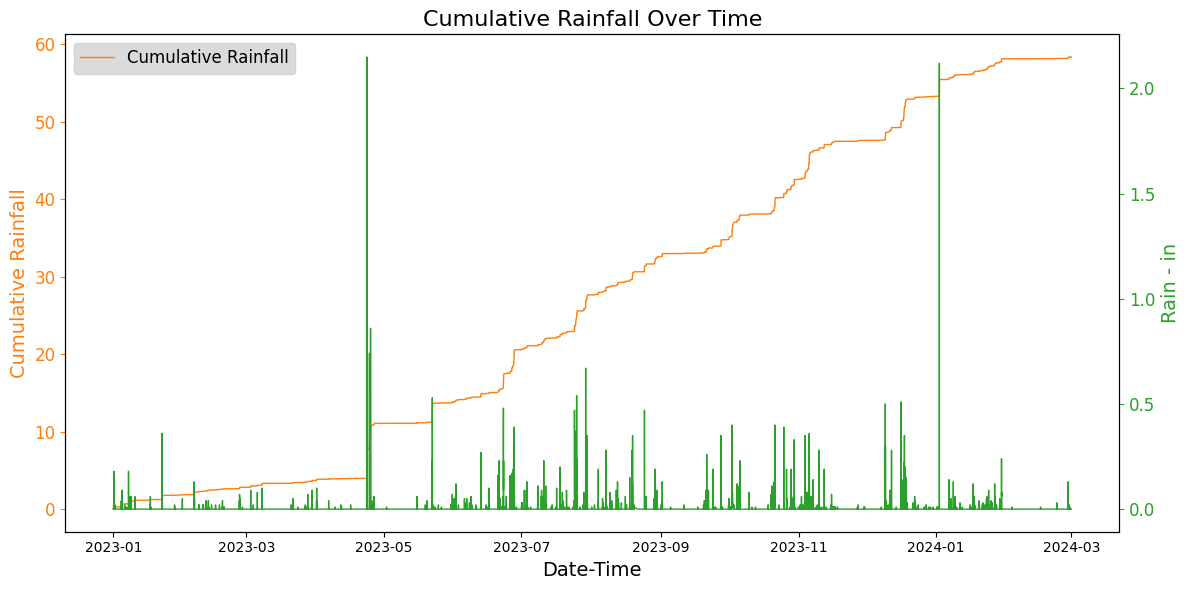

In [ ]:
# @title
#Cumulative Rainfall
# Calculate cumulative rainfall
df['Cumulative Rainfall'] = df['Rain - in'].cumsum()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the Cumulative Rainfall
ax1.plot(df['Date & Time'], df['Cumulative Rainfall'], color='tab:orange', label='Cumulative Rainfall', linewidth=1)
ax1.set_xlabel('Date-Time', fontsize=14)
ax1.set_ylabel('Cumulative Rainfall', color='tab:orange', fontsize=14)
ax1.tick_params(axis='y', labelsize=12, colors='tab:orange')

# Create second y-axis to plot Water Level
ax2 = ax1.twinx()
ax2.plot(df['Date & Time'], df['Rain - in'],
         color='tab:green', label='Rain - in', linewidth=1)
ax2.set_ylabel('Rain - in', color='tab:green', fontsize=14)
ax2.tick_params(axis='y', labelsize=12, colors='tab:green')

# Add legends and title
ax1.legend(loc='upper left', fontsize=12, facecolor='lightgrey')

plt.title('Cumulative Rainfall Over Time', fontsize=16)
fig.tight_layout()
plt.show()

### Rainfall Data Comparison
Climate Data in Drive
https://drive.google.com/drive/folders/17vK1Umt7d0dLFVCvBdcWgrmbBwvdJiUt

# Soil Moisture

<ipython-input-6-d96c3f48f819>:7: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/Shareddrives/2.5 Monitoring Data/Surface Water Program/Collated/Soil - utf8.csv", encoding='utf-8')


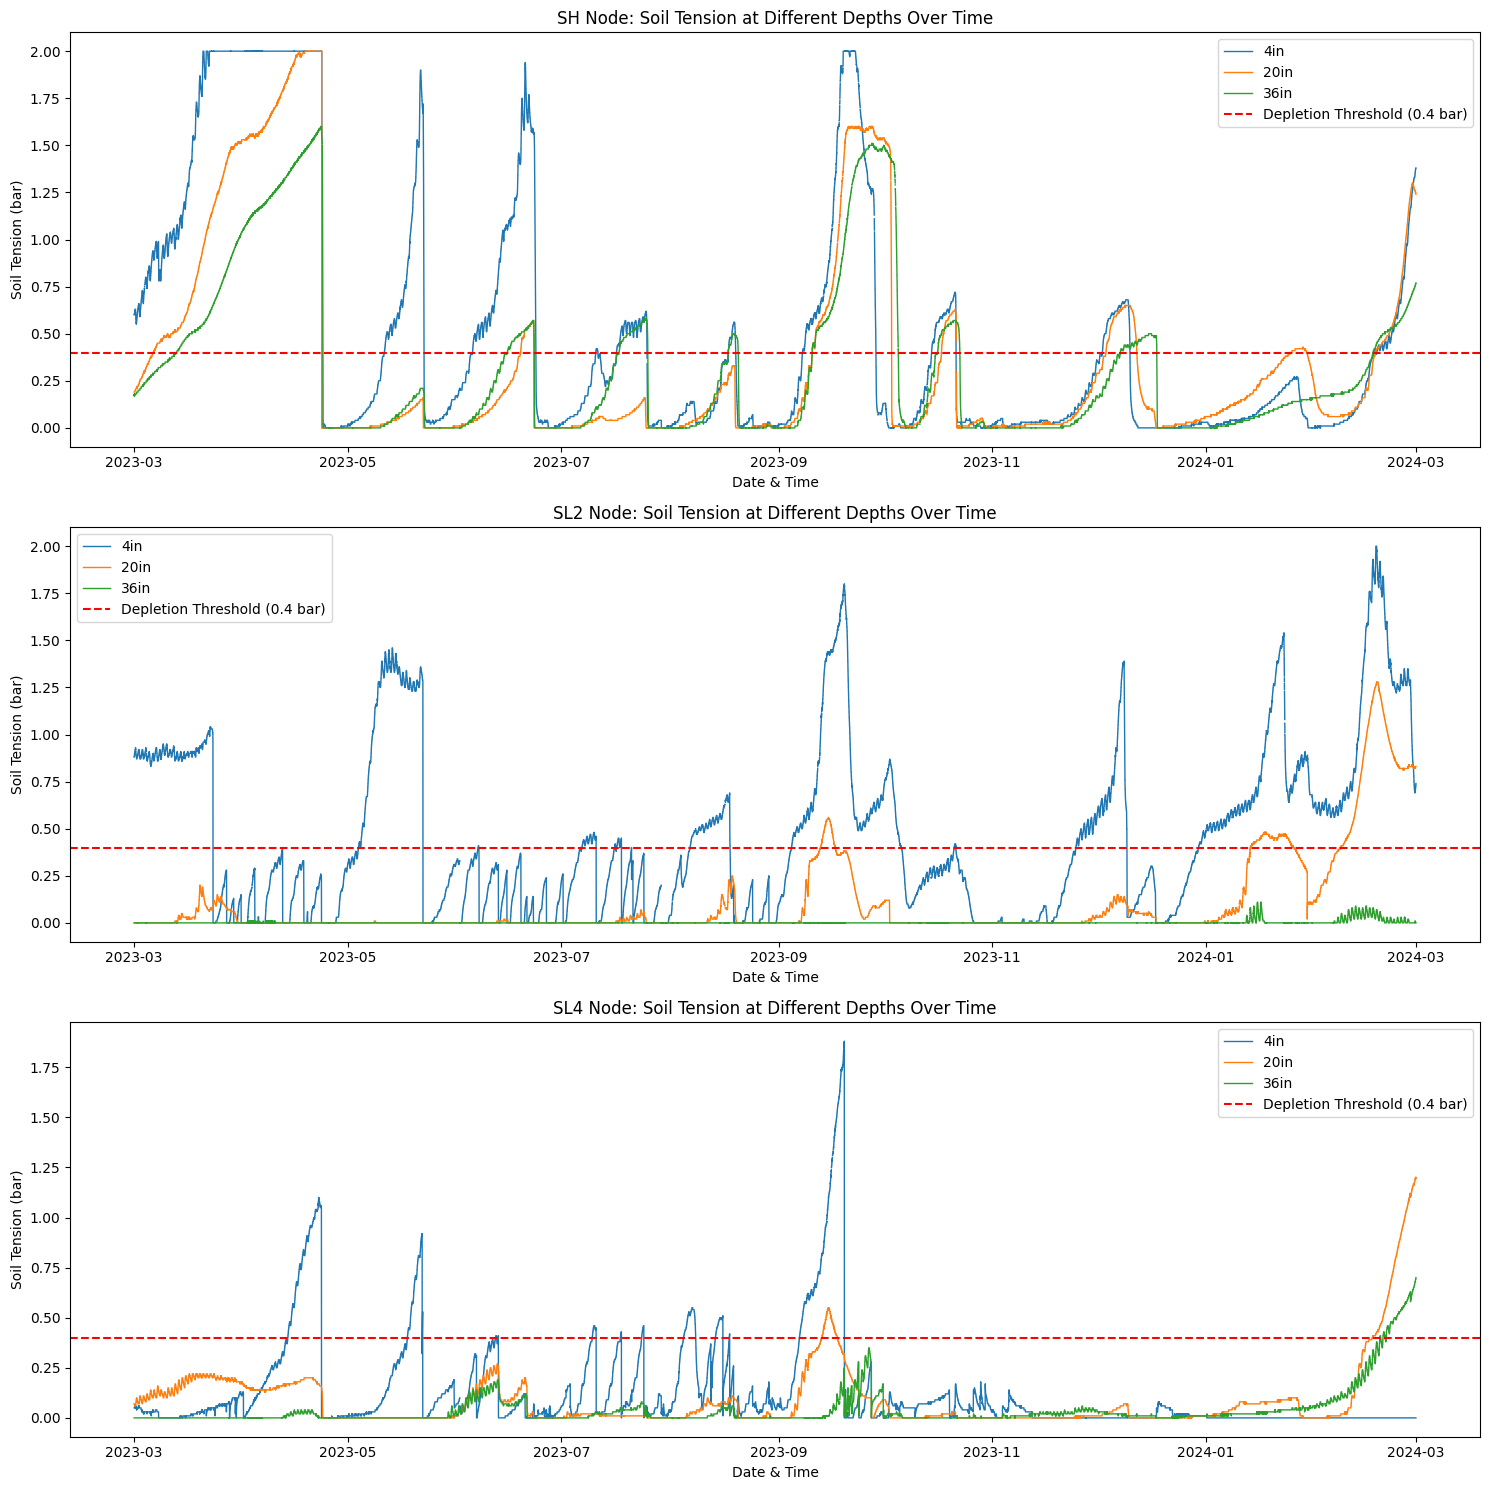

              sh_4in       sh_20in        sh_36in        sl2_4in  \
count  104950.000000  104949.00000  104949.000000  104916.000000   
mean        0.502143       0.36142       0.312304       0.462222   
std         0.656136       0.53841       0.418618       0.449517   
min         0.000000       0.00000       0.000000       0.000000   
25%         0.030000       0.01000       0.000000       0.080000   
50%         0.150000       0.09000       0.130000       0.330000   
75%         0.670000       0.47000       0.490000       0.680000   
max         2.000000       2.00000       1.600000       2.000000   

            sl2_20in       sl2_36in        sl4_4in       sl4_20in  \
count  104914.000000  104910.000000  105296.000000  105286.000000   
mean        0.103926       0.002137       0.127700       0.088690   
std         0.229542       0.010427       0.247374       0.165171   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading data into df (replace this with your actual data loading step)
df = pd.read_csv("/content/drive/Shareddrives/2.5 Monitoring Data/Surface Water Program/Collated/Soil - utf8.csv", encoding='utf-8')

# Drop unnecessary rows
df = df.iloc[4:]

# Set the column names to be the values in the 2nd row (index 1)
df.columns = df.iloc[0]

# Drop the row used as header
df = df[1:]

# Reset the index
df.reset_index(drop=True, inplace=True)

# Drop unnecessary columns
#df.drop(['Barometer - in Hg', 'High Solar Rad - W/m^2', 'Solar Rad - W/m^2', 'Leaf Wetness', 'High Leaf Wetness', 'Leaf Wetness Minutes'], axis=1, inplace=True)

# Replace '--' with NaN for numerical computation
df.replace('--', np.nan, inplace=True)

#rename columns for easier use
df.columns = ['Date & Time', 'sh_4in', 'sh_20in', 'sh_36in',
              'sl2_4in', 'sl2_20in', 'sl2_36in', 'sl4_4in', 'sl4_20in', 'sl4_36in']

# Convert the 'Date & Time' column to datetime format
#df['Date & Time'] = pd.to_datetime(df['Date & Time'])
#df['Date & Time'] = pd.to_datetime(df['Date & Time'], format='%m-%d-%Y %H:%M')
df['Date & Time'] = pd.to_datetime(df['Date & Time'], errors='coerce', format='%m/%d/%Y %H:%M')

# Columns to convert
cols_to_convert = df.columns[1:]

# Perform the conversion
df[cols_to_convert] = df[cols_to_convert].astype('float64')

sh_summary_4in = df['sh_4in'].describe()
sh_summary_20in = df['sh_20in'].describe()
sh_summary_36in = df['sh_36in'].describe()

sl2_summary_4in = df['sl2_4in'].describe()
sl2_summary_20in = df['sl2_20in'].describe()
sl2_summary_36in = df['sl2_36in'].describe()

sl4_summary_4in = df['sl4_4in'].describe()
sl4_summary_20in = df['sl4_20in'].describe()
sl4_summary_36in = df['sl4_36in'].describe()

summary_table = pd.concat([sh_summary_4in, sh_summary_20in, sh_summary_36in, sl2_summary_4in, sl2_summary_20in, sl2_summary_36in, sl4_summary_4in, sl4_summary_20in, sl4_summary_36in], axis=1)
summary_table.columns = ['sh_4in', 'sh_20in', 'sh_36in', 'sl2_4in', 'sl2_20in', 'sl2_36in', 'sl4_4in', 'sl4_20in', 'sl4_36in']

# Export the summary statistics table to an Excel file
summary_table.to_excel('Summary_Statistics_Table_SoilMoistures.xlsx')

# Set 'Date & Time' as the index
df.set_index('Date & Time', inplace=True)

# Generate summary statistics for each month
summary_stats_per_month = df.resample('M').apply(lambda x: x.describe())


# Display the result (for demonstration purposes, you can save it to a file)
summary_stats_per_month.to_excel('Summary_Statistics_Table_SoilMoistures_month.xlsx')

# Plotting Section
nodes = ['sh', 'sl2', 'sl4']
depths = ['4in', '20in', '36in']

fig, axs = plt.subplots(3, 1, figsize=(15, 15))

for i, node in enumerate(nodes):
    for depth in depths:
        col_name = f"{node}_{depth}"
        axs[i].plot(df.index, df[col_name], label=depth, linewidth=1)

    # Add a horizontal line at 0.4 bar
    axs[i].axhline(0.4, color='red', linestyle='--', label='Depletion Threshold (0.4 bar)')

    axs[i].set_title(f'{node.upper()} Node: Soil Tension at Different Depths Over Time')
    axs[i].set_xlabel('Date & Time')
    axs[i].set_ylabel('Soil Tension (bar)')
    axs[i].legend()

plt.tight_layout()
plt.savefig('Soil_Moisture_Over_Time.png', dpi=300, format='png')
plt.show()
print(summary_table)

# South Lake Water Level

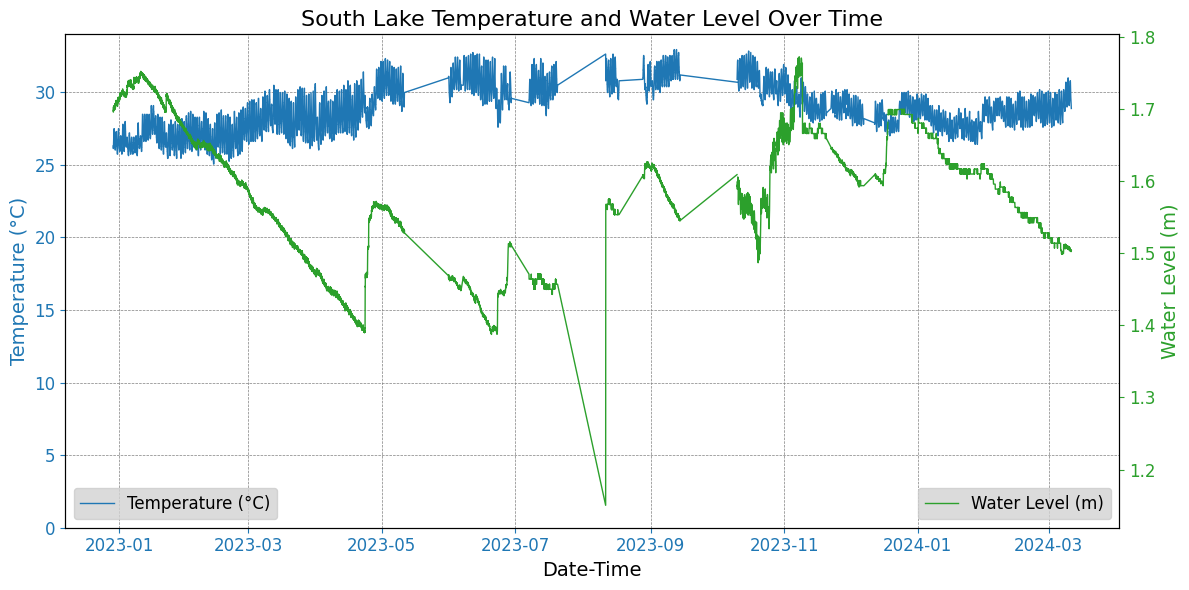

In [ ]:
# @title
import pandas as pd

# Assuming the file is named 'SL-Waterlevel_collated.xlsx'
df = pd.read_excel('/content/drive/Shareddrives/2.5 Monitoring Data/Surface Water Program/Collated/SL-Waterlevel_collated.xlsx')

# Check for missing values
missing_values = df.isnull().sum()

# Drop or fill missing values if any
#df.dropna(inplace=True)  # or df.fillna(value)

df['Date-Time (Bolivia Standard Time)'] = pd.to_datetime(df['Date-Time (Bolivia Standard Time)'])

# Summary statistics for water level
summary_water_level = df['Water Level   (m)'].describe()
summary_temperature = df['Ch: 3 - Temperature   (°C)'].describe()

summary_table = pd.concat([summary_water_level, summary_temperature], axis=1)
summary_table.columns = ['Waterlevel', 'Temperature_C']

# Export the summary statistics table to an Excel file
summary_table.to_excel('Summary_Statistics_Table_SL_Waterlevel.xlsx')

import matplotlib.pyplot as plt

# Create a new figure and set of subplots (axes)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Temperature on the first y-axis
ax1.plot(df['Date-Time (Bolivia Standard Time)'], df['Ch: 3 - Temperature   (°C)'],
         color='tab:blue', label='Temperature (°C)', linewidth=1) #you can add a marker to this with ,marker='x',
ax1.set_xlabel('Date-Time', fontsize=14)
ax1.set_ylabel('Temperature (°C)', color='tab:blue', fontsize=14)
ax1.tick_params(axis='both', labelsize=12, colors='tab:blue')
ax1.set_ylim(0, 34)

# Add grid lines for better readability
ax1.grid(True, linestyle='--', linewidth=0.5, color='grey')

# Create second y-axis to plot Water Level
ax2 = ax1.twinx()
ax2.plot(df['Date-Time (Bolivia Standard Time)'], df['Water Level   (m)'],
         color='tab:green', label='Water Level (m)', linewidth=1)
ax2.set_ylabel('Water Level (m)', color='tab:green', fontsize=14)
ax2.tick_params(axis='y', labelsize=12, colors='tab:green')

# Add title and set its size
plt.title('South Lake Temperature and Water Level Over Time', fontsize=16)

# Layout adjustment for better visualization
fig.tight_layout()

# Add legends with background color
ax1.legend(loc='lower left', fontsize=12, facecolor='lightgrey')
ax2.legend(loc='lower right', fontsize=12, facecolor='lightgrey')

plt.show()


# UWI Waterlevel

The typical calculation to convert the pressure recorded by the sensor to water level in meters involves several steps:

1. **Pressure Reading**: The water level logger records the pressure exerted by the water column above the sensor. This pressure is usually recorded in units such as psi (pounds per square inch) or kPa (kilopascals).

2. **Atmospheric Pressure Correction**: Since the total pressure recorded by the sensor includes both the water pressure and atmospheric pressure, it's essential to subtract the atmospheric pressure to isolate the pressure due to the water column alone. This can be done using a barometric logger set up near the water level logger or built-in atmospheric compensation features in the sensor.

3. **Conversion to Water Height**: The pressure due to the water column (water pressure) is directly proportional to the height of the water column. The relationship is given by the hydrostatic equation:

   \[h = \frac{P}{ρg}\]

   where:
   - \(h\) is the height of the water column (water level) in meters,
   - \(P\) is the water pressure in pascals (Pa),
   - \(ρ\) is the density of the water (approximately 1000 kg/m³ for freshwater),
   - \(g\) is the acceleration due to gravity (approximately 9.81 m/s²).

   If the pressure is not in pascals, it should be converted to pascals before applying this formula.

4. **Depth to Water Level**: The measured water pressure converted to the water column height represents the depth from the sensor to the water surface. If the sensor is placed at a known depth below a reference point (such as the top of a well or the lake surface), you can calculate the water level relative to this reference point by subtracting the water column height from the total depth at which the sensor is placed.


# North Lake Water Level

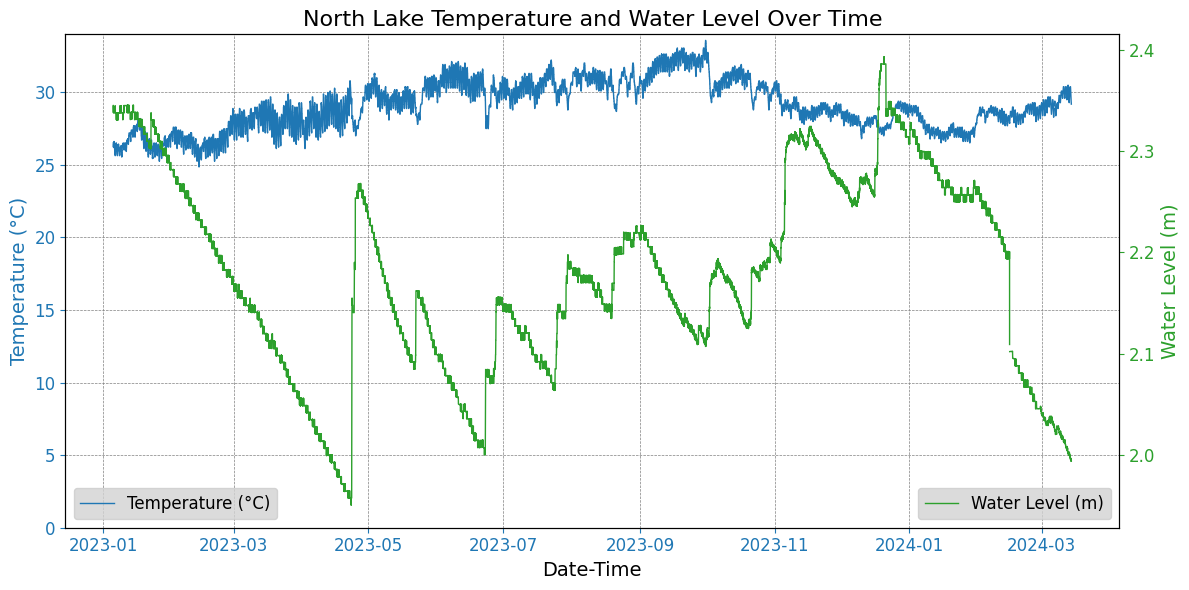

In [ ]:
# @title
import pandas as pd

# Assuming the file is named 'SL-Waterlevel_collated.xlsx'
df = pd.read_excel('/content/drive/Shareddrives/2.5 Monitoring Data/Surface Water Program/Collated/NL - Waterlevel collated.xlsx')

# Check for missing values
missing_values = df.isnull().sum()

# Drop or fill missing values if any
#df.dropna(inplace=True)  # or df.fillna(value)

df['Date-Time (Bolivia Standard Time)'] = pd.to_datetime(df['Date-Time (Bolivia Standard Time)'])

# Summary statistics for water level
summary_water_level = df['Water Level   (m)'].describe()
summary_temperature = df['Ch:3 - Temperature   (°C)'].describe()

summary_table = pd.concat([summary_water_level, summary_temperature], axis=1)
summary_table.columns = ['Waterlevel', 'Temperature_C']

# Export the summary statistics table to an Excel file
summary_table.to_excel('Summary_Statistics_Table_NL_Waterlevel.xlsx')

import matplotlib.pyplot as plt

# Create a new figure and set of subplots (axes)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Temperature on the first y-axis
ax1.plot(df['Date-Time (Bolivia Standard Time)'], df['Ch:3 - Temperature   (°C)'],
         color='tab:blue', label='Temperature (°C)', linewidth=1) #you can add a marker to this with ,marker='x',
ax1.set_xlabel('Date-Time', fontsize=14)
ax1.set_ylabel('Temperature (°C)', color='tab:blue', fontsize=14)
ax1.tick_params(axis='both', labelsize=12, colors='tab:blue')
ax1.set_ylim(0, 34)

# Add grid lines for better readability
ax1.grid(True, linestyle='--', linewidth=0.5, color='grey')

# Create second y-axis to plot Water Level
ax2 = ax1.twinx()
ax2.plot(df['Date-Time (Bolivia Standard Time)'], df['Water Level   (m)'],
         color='tab:green', label='Water Level (m)', linewidth=1)
ax2.set_ylabel('Water Level (m)', color='tab:green', fontsize=14)
ax2.tick_params(axis='y', labelsize=12, colors='tab:green')

# Add title and set its size
plt.title('North Lake Temperature and Water Level Over Time', fontsize=16)

# Layout adjustment for better visualization
fig.tight_layout()

# Add legends with background color
ax1.legend(loc='lower left', fontsize=12, facecolor='lightgrey')
ax2.legend(loc='lower right', fontsize=12, facecolor='lightgrey')

plt.show()

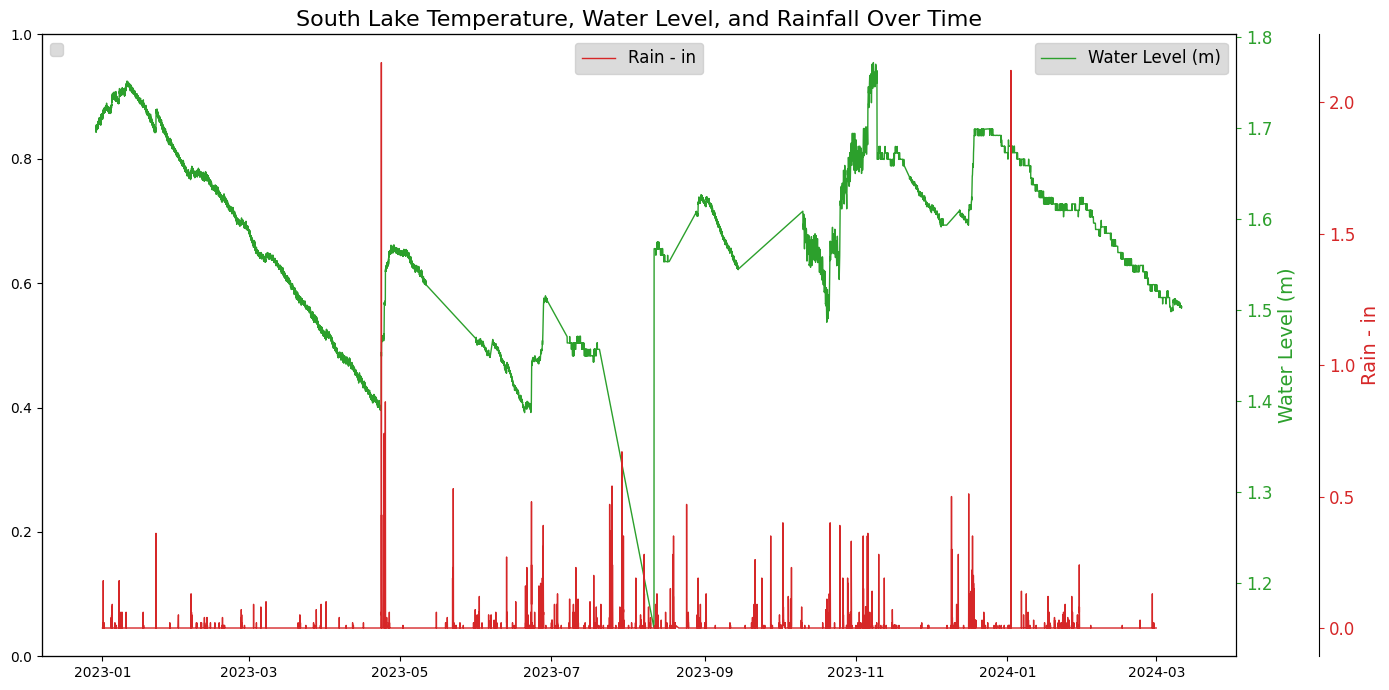

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('/content/drive/Shareddrives/2.5 Monitoring Data/Surface Water Program/Collated/SL-Waterlevel_collated.xlsx')

# Convert 'Date-Time' to datetime and set it as the index
df['Date-Time (Bolivia Standard Time)'] = pd.to_datetime(df['Date-Time (Bolivia Standard Time)'])
df.set_index('Date-Time (Bolivia Standard Time)', inplace=True)

# Interpolate missing values
df.interpolate(method='time', inplace=True)

# Reading data into df (replace this with your actual data loading step)
df2 = pd.read_csv("/content/drive/Shareddrives/2.5 Monitoring Data/Surface Water Program/Collated/Weather - utf8.csv", skiprows=4)  # Skip initial non-data rows directly during import

# Replace '--' with 0 for numerical computation
df2.replace('--', 0, inplace=True)

# Assuming the actual column names are in the first row of the df after dropping unnecessary rows
df2.columns = df2.iloc[0]

# Drop the row with column names
df2 = df2[1:]

# Change Date Times
df2['Date & Time'] = pd.to_datetime(df2['Date & Time'], errors='coerce')
df2.set_index('Date & Time', inplace=True)


wind_direction_map = {
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5
}

# Assuming the direction is mapped to angles
df2['Wind Direction'] = df2['Wind Direction'].map(wind_direction_map)
df2['High Wind Direction'] = df2['High Wind Direction'].map(wind_direction_map)

# Convert numerical columns to their respective types
numerical_cols_to_float = ['Barometer - in Hg', 'Wind Run - mi', 'Rain - in', 'Rain Rate - in/h', 'Solar Energy - Ly', 'ET - in', 'UV Dose - MEDs', 'Heating Degree Days', 'Cooling Degree Days']
numerical_cols_to_int = ['Temp - °F', 'High Temp - °F', 'Low Temp - °F', 'Hum - %', 'Dew Point - °F', 'Wet Bulb - °F', 'Wind Speed - mph', 'High Wind Speed - mph', 'Wind Chill - °F', 'Heat Index - °F', 'THW Index - °F', 'THSW Index - °F', 'Solar Rad - W/m^2' , 'High Solar Rad - W/m^2', 'UV Index', 'High UV Index']

df2[numerical_cols_to_float] = df2[numerical_cols_to_float].astype('float64')
df2[numerical_cols_to_int] = df2[numerical_cols_to_int].apply(pd.to_numeric, errors='coerce')  # Coerce invalid parsing to NaN

# Assuming 'Date & Time' columns in both datasets have been converted to datetime and set as index

# Step 1: Resample both datasets to a common frequency if needed
df_resampled = df.resample('H').interpolate()
df2_resampled = df2.resample('H').interpolate()

# Step 2: Align the time range
# Trim based on the overlapping time range
start = max(df_resampled.index.min(), df2_resampled.index.min())
end = min(df_resampled.index.max(), df2_resampled.index.max())

df_aligned = df_resampled[start:end]
df2_aligned = df2_resampled[start:end]

# Step 3: Merge the datasets
# You can choose an outer, inner, left, or right merge depending on your need
merged_df = pd.merge(df_aligned, df2_aligned, left_index=True, right_index=True, how='inner')


# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

'''# Plot Temperature
ax1.plot(df.index, df['Ch: 3 - Temperature   (°C)'], color='tab:blue', label='Temperature (°C)', linewidth=1)
ax1.set_xlabel('Date-Time', fontsize=14)
ax1.set_ylabel('Temperature (°C)', color='tab:blue', fontsize=14)
ax1.tick_params(axis='both', labelsize=12, colors='tab:blue')
ax1.grid(True, linestyle='--', linewidth=0.5, color='grey')
'''
# Create second y-axis to plot Water Level
ax2 = ax1.twinx()
ax2.plot(df.index, df['Water Level   (m)'], color='tab:green', label='Water Level (m)', linewidth=1)
ax2.set_ylabel('Water Level (m)', color='tab:green', fontsize=14)
ax2.tick_params(axis='y', labelsize=12, colors='tab:green')

# Create third y-axis to plot Rainfall
ax3 = ax1.twinx()
ax3.plot(df2.index, df2['Rain - in'], color='tab:red', label='Rain - in', linewidth=1)
ax3.set_ylabel('Rain - in', color='tab:red', fontsize=14)
ax3.tick_params(axis='y', labelsize=12, colors='tab:red')

# Adjust position of the third y-axis
ax3.spines['right'].set_position(('outward', 60))

# Add title and set its size
plt.title('South Lake Temperature, Water Level, and Rainfall Over Time', fontsize=16)

# Layout adjustment
fig.tight_layout()

# Add legends with background color
ax1.legend(loc='upper left', fontsize=12, facecolor='lightgrey')
ax2.legend(loc='upper right', fontsize=12, facecolor='lightgrey')
ax3.legend(loc='upper center', fontsize=12, facecolor='lightgrey')

plt.show()

# MB-4

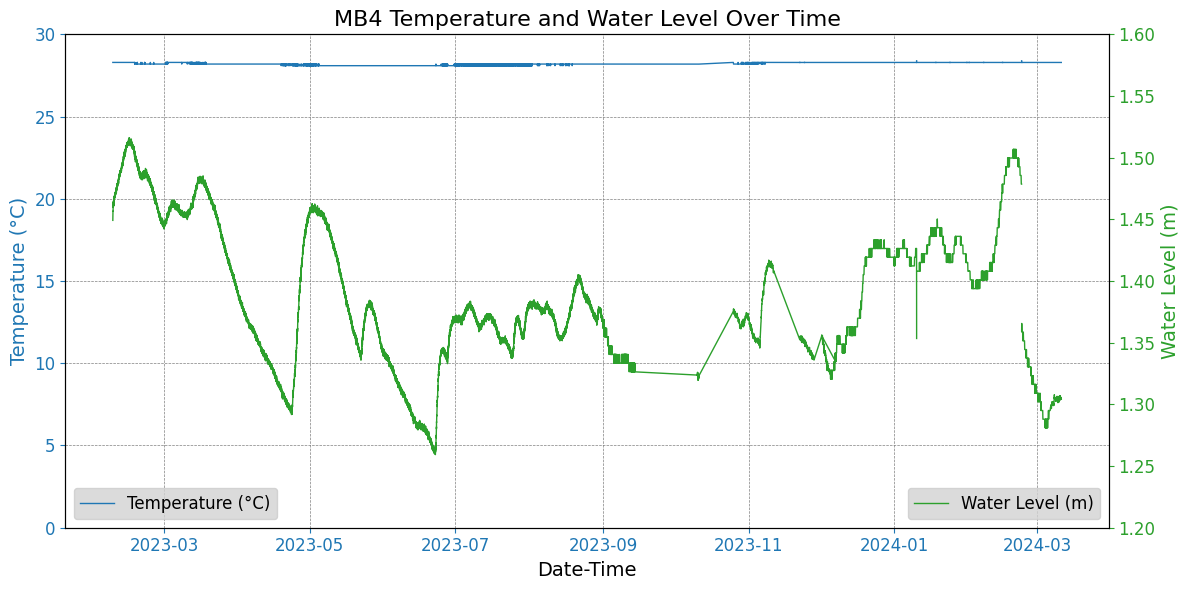

In [ ]:
# @title
import pandas as pd

# Assuming the file is named 'SL-Waterlevel_collated.xlsx'
df = pd.read_excel('/content/drive/Shareddrives/2.5 Monitoring Data/Surface Water Program/Collated/MB-4 collated.xlsx')

# Check for missing values
missing_values = df.isnull().sum()

# Drop or fill missing values if any
df.dropna(how='all', inplace=True)  # or df.fillna(value)

df['Date-Time (AST)'] = pd.to_datetime(df['Date-Time (AST)'])

# Round to the nearest integer first, then convert to int
#df['Ch: 3 - Temperature   (°C)'] = df['Ch: 3 - Temperature   (°C)'].round().astype(int)


# Summary statistics for water level
summary_water_level = df['Water Level   (m)'].describe()
summary_temperature = df['Ch: 3 - Temperature   (°C)'].describe()

summary_table = pd.concat([summary_water_level, summary_temperature], axis=1)
summary_table.columns = ['Waterlevel', 'Temperature_C']

# Export the summary statistics table to an Excel file
summary_table.to_excel('Summary_Statistics_Table_MB4_Waterlevel.xlsx')

import matplotlib.pyplot as plt

# Create a new figure and set of subplots (axes)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Temperature on the first y-axis
ax1.plot(df['Date-Time (AST)'], df['Ch: 3 - Temperature   (°C)'],
         color='tab:blue', label='Temperature (°C)', linewidth=1)
ax1.set_xlabel('Date-Time', fontsize=14)
ax1.set_ylabel('Temperature (°C)', color='tab:blue', fontsize=14)
ax1.tick_params(axis='both', labelsize=12, colors='tab:blue')
ax1.set_ylim(0, 30)

# Add grid lines for better readability
ax1.grid(True, linestyle='--', linewidth=0.5, color='grey')

# Create second y-axis to plot Water Level
ax2 = ax1.twinx()
ax2.plot(df['Date-Time (AST)'], df['Water Level   (m)'],
         color='tab:green', label='Water Level (m)', linewidth=1)
ax2.set_ylabel('Water Level (m)', color='tab:green', fontsize=14)
ax2.tick_params(axis='y', labelsize=12, colors='tab:green')
ax2.set_ylim(1.2, 1.6)

# Add title and set its size
plt.title('MB4 Temperature and Water Level Over Time', fontsize=16)

# Layout adjustment for better visualization
fig.tight_layout()

# Add legends with background color
ax1.legend(loc='lower left', fontsize=12, facecolor='lightgrey')
ax2.legend(loc='lower right', fontsize=12, facecolor='lightgrey')

plt.show()

# South Lake Conductivity

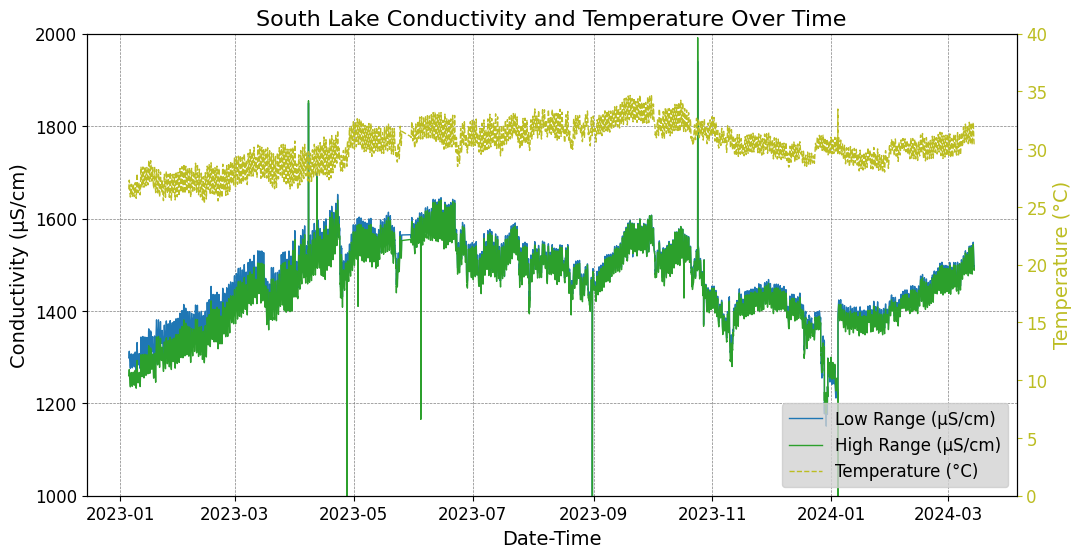

In [ ]:
# @title
import pandas as pd

# Assuming the file is named 'sl conductivity.xlsx'
df = pd.read_excel('/content/drive/Shareddrives/2.5 Monitoring Data/Surface Water Program/Collated/SL-Conductivity_collated.xlsx')

# Check for missing values
missing_values = df.isnull().sum()

# Drop or fill missing values if any
#df.dropna(inplace=True)  # or df.fillna(value)

# Rename columns for easier reference
df.columns = ['Date_Time', 'Low_Range', 'High_Range', 'Temperature_F']

# Convert to DateTime
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

# Convert temperature from Fahrenheit to Celsius
df['Temperature_C'] = (df['Temperature_F'] - 32) * 5/9

# Summary statistics
summary_low_range = df['Low_Range'].describe()
summary_high_range = df['High_Range'].describe()
summary_temperature_c = df['Temperature_C'].describe()

summary_table = pd.concat([summary_low_range, summary_high_range, summary_temperature_c], axis=1)
summary_table.columns = ['Low_Range', 'High_Range', 'Temperature_C']

# Export the summary statistics table to an Excel file
summary_table.to_excel('Summary_Statistics_Table_SL_Conductivity.xlsx')

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Low Range and High Range on the first y-axis
ax1.plot(df['Date_Time'], df['Low_Range'],
         color='tab:blue', label='Low Range (μS/cm)', linewidth=1)
ax1.plot(df['Date_Time'], df['High_Range'],
         color='tab:green', label='High Range (μS/cm)', linewidth=1)
ax1.set_xlabel('Date-Time', fontsize=14)
ax1.set_ylabel('Conductivity (μS/cm)', fontsize=14)
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(True, linestyle='--', linewidth=0.5, color='grey')
ax1.set_ylim(1000, 2000)

# Create second y-axis to plot Temperature
ax2 = ax1.twinx()
ax2.plot(df['Date_Time'], df['Temperature_C'],
         color='tab:olive', label='Temperature (°C)', linestyle='--', linewidth=1)
ax2.set_ylabel('Temperature (°C)', color='tab:olive', fontsize=14)
ax2.tick_params(axis='y', labelsize=12, colors='tab:olive')
ax2.set_ylim(0, 40)

# Add title and legend
plt.title('South Lake Conductivity and Temperature Over Time', fontsize=16)

# Add legends at the bottom
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower right', fontsize=12, facecolor='lightgrey')

plt.show()

# North Lake Conductivity

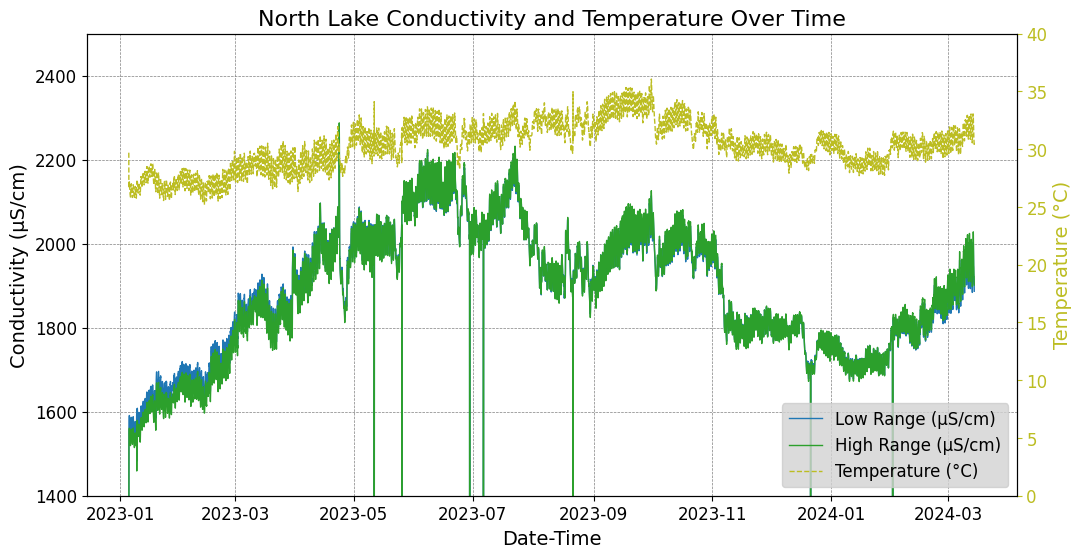

In [ ]:
# @title
import pandas as pd

# Assuming the file is named 'sl conductivity.xlsx'
df = pd.read_excel('/content/drive/Shareddrives/2.5 Monitoring Data/Surface Water Program/Collated/NL-Conductivity_collated.xlsx')

# Check for missing values
missing_values = df.isnull().sum()

# Drop or fill missing values if any
#df.dropna(inplace=True)  # or df.fillna(value)

# Rename columns for easier reference
df.columns = ['Date_Time', 'Low_Range', 'High_Range', 'Temperature_F']

# Convert to DateTime
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

# Convert temperature from Fahrenheit to Celsius
df['Temperature_C'] = (df['Temperature_F'] - 32) * 5/9

# Summary statistics
summary_low_range = df['Low_Range'].describe()
summary_high_range = df['High_Range'].describe()
summary_temperature_c = df['Temperature_C'].describe()

summary_table = pd.concat([summary_low_range, summary_high_range, summary_temperature_c], axis=1)
summary_table.columns = ['Low_Range', 'High_Range', 'Temperature_C']

# Export the summary statistics table to an Excel file
summary_table.to_excel('Summary_Statistics_Table_NL_Conductivity.xlsx')

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Low Range and High Range on the first y-axis
ax1.plot(df['Date_Time'], df['Low_Range'],
         color='tab:blue', label='Low Range (μS/cm)', linewidth=1)
ax1.plot(df['Date_Time'], df['High_Range'],
         color='tab:green', label='High Range (μS/cm)', linewidth=1)
ax1.set_xlabel('Date-Time', fontsize=14)
ax1.set_ylabel('Conductivity (μS/cm)', fontsize=14)
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(True, linestyle='--', linewidth=0.5, color='grey')
ax1.set_ylim(1400, 2500)

# Create second y-axis to plot Temperature
ax2 = ax1.twinx()
ax2.plot(df['Date_Time'], df['Temperature_C'],
         color='tab:olive', label='Temperature (°C)', linestyle='--', linewidth=1)
ax2.set_ylabel('Temperature (°C)', color='tab:olive', fontsize=14)
ax2.tick_params(axis='y', labelsize=12, colors='tab:olive')
ax2.set_ylim(0, 40)

# Add title and legend
plt.title('North Lake Conductivity and Temperature Over Time', fontsize=16)

# Add legends at the bottom
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower right', fontsize=12, facecolor='lightgrey')

plt.show()

# South Lake pH

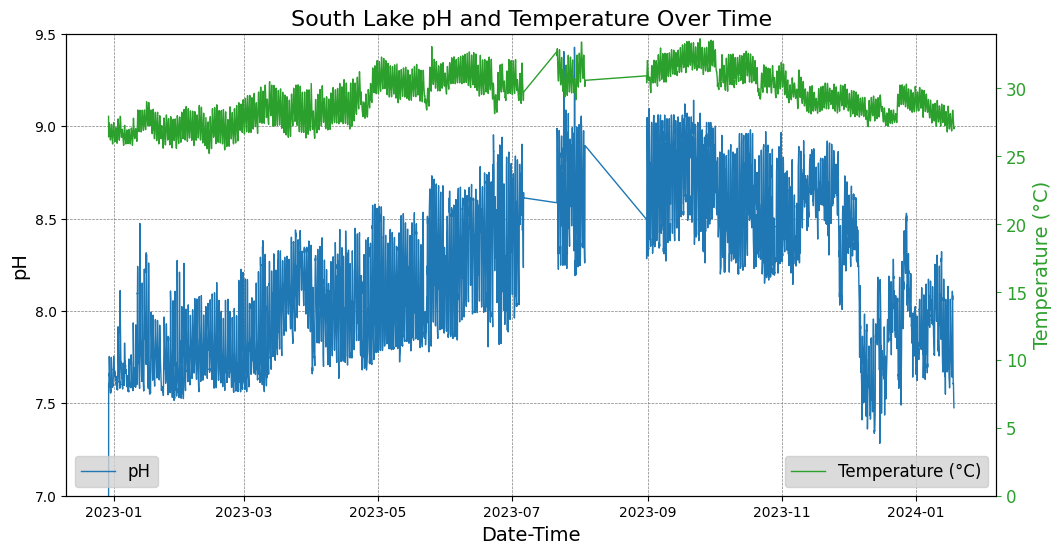

In [ ]:
# @title
import pandas as pd

# Assuming the file is named 'sl pH.xlsx'
df = pd.read_excel('/content/drive/Shareddrives/2.5 Monitoring Data/Surface Water Program/Collated/SL-pH_collated.xlsx')

# Check for missing values
missing_values = df.isnull().sum()

# Drop or fill missing values if any
#df.dropna(inplace=True)  # or df.fillna(value)

# Rename columns for easier reference
df.columns = ['#', 'Date_Time', 'Temperature_C', 'MilliVolts', 'pH']

# Convert to DateTime
df['Date_Time'] = pd.to_datetime(df['Date_Time'])


# Summary statistics
summary_temperature_c = df['Temperature_C'].describe()
summary_pH = df['pH'].describe()

summary_table = pd.concat([summary_temperature_c, summary_pH], axis=1)
summary_table.columns = ['Temperature_C', 'pH']

# Export the summary statistics table to an Excel file
summary_table.to_excel('Summary_Statistics_Table_SL_pH.xlsx')

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Low Range and High Range on the first y-axis
ax1.plot(df['Date_Time'], df['pH'],
         color='tab:blue', label='pH', linewidth=1)
ax1.set_xlabel('Date-Time', fontsize=14)
ax1.set_ylabel('pH', fontsize=14)
#ax1.tick_params(axis='both', labelsize=12)
ax1.grid(True, linestyle='--', linewidth=0.5, color='grey')
ax1.set_ylim(7, 9.5)

# Create second y-axis to plot Temperature
ax2 = ax1.twinx()
ax2.plot(df['Date_Time'], df['Temperature_C'],
         color='tab:green', label='Temperature (°C)', linewidth=1)
ax2.set_ylabel('Temperature (°C)', color='tab:green', fontsize=14)
ax2.tick_params(axis='y', labelsize=12, colors='tab:green')
ax2.set_ylim(0, 34)

# Add title and legend
plt.title('South Lake pH and Temperature Over Time', fontsize=16)

# Add legends at the bottom
ax1.legend(loc='lower left', fontsize=12, facecolor='lightgrey')
ax2.legend(loc='lower right', fontsize=12, facecolor='lightgrey')

plt.show()

# North Lake pH

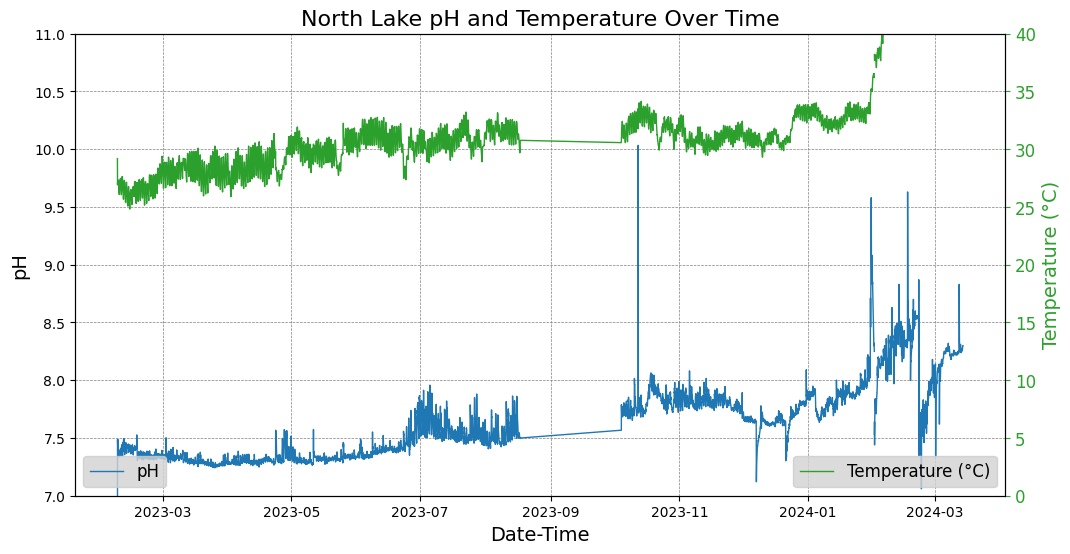

In [ ]:
# @title
import pandas as pd

# Assuming the file is named 'sl pH.xlsx'
df = pd.read_excel('/content/drive/Shareddrives/2.5 Monitoring Data/Surface Water Program/Collated/NL - pH collated.xlsx')

# Check for missing values
missing_values = df.isnull().sum()

# Drop or fill missing values if any
#df.dropna(inplace=True)  # or df.fillna(value)

# Rename columns for easier reference
df.columns = ['#', 'Date_Time', 'Temperature_C', 'MilliVolts', 'pH']

# Convert to DateTime
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

# Summary statistics
summary_temperature_c = df['Temperature_C'].describe()
summary_pH = df['pH'].describe()

summary_table = pd.concat([summary_temperature_c, summary_pH], axis=1)
summary_table.columns = ['Temperature_C', 'pH']

# Export the summary statistics table to an Excel file
summary_table.to_excel('Summary_Statistics_Table_NL_pH.xlsx')

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Low Range and High Range on the first y-axis
ax1.plot(df['Date_Time'], df['pH'],
         color='tab:blue', label='pH', linewidth=1)
ax1.set_xlabel('Date-Time', fontsize=14)
ax1.set_ylabel('pH', fontsize=14)
#ax1.tick_params(axis='both', labelsize=12)
ax1.grid(True, linestyle='--', linewidth=0.5, color='grey')
ax1.set_ylim(7, 11)

# Create second y-axis to plot Temperature
ax2 = ax1.twinx()
ax2.plot(df['Date_Time'], df['Temperature_C'],
         color='tab:green', label='Temperature (°C)', linewidth=1)
ax2.set_ylabel('Temperature (°C)', color='tab:green', fontsize=14)
ax2.tick_params(axis='y', labelsize=12, colors='tab:green')
ax2.set_ylim(0, 40)

# Add title and legend
plt.title('North Lake pH and Temperature Over Time', fontsize=16)

# Add legends at the bottom
ax1.legend(loc='lower left', fontsize=12, facecolor='lightgrey')
ax2.legend(loc='lower right', fontsize=12, facecolor='lightgrey')

plt.show()

# YSI Data


Data from Cherissa

Data from Yashua

[Imputing Missing Data](https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/)

[link text](https://www.theanalysisfactor.com/missing-data-two-recommended-solutions/)

[link text](https://github.com/RianneSchouten/missing_data_science/blob/master/sims/notebooks/1.2-rms-evaluation_complete_data.ipynb)